In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
df = df.drop(['car_name'], axis = 1)
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [ ]:
df = pd.get_dummies(df,columns = ['origin'])
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,0,True,False,False


In [ ]:
df = df.replace('?', np.nan)
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')
df = df.apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]

In [ ]:
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 1)
X_train.shape

(278, 10)

In [ ]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.32102238569161046
The coefficient for disp is 0.3248343091848398
The coefficient for hp is -0.22916950059437655
The coefficient for wt is -0.7112101905072297
The coefficient for acc is 0.014713682764191029
The coefficient for yr is 0.37558119495107434
The coefficient for car_type is 0.38147694842331054
The coefficient for origin_america is -0.07472247547584163
The coefficient for origin_asia is 0.044515252035678465
The coefficient for origin_europe is 0.04834854953945399
The intercept is 0.019284116103639733


In [ ]:
ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))

Ridge model coef: [ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
  0.37725608 -0.07423624  0.04441039  0.04784031]


In [ ]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [ ]:
#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343617931312616
0.8518882171608504
*************************
0.7938010766228453
0.8375229615977083


In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_poly = poly.fit_transform(X_s)

In [ ]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [ ]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

,0
Intercept,0.019284
cyl,0.321022
disp,0.324834
hp,-0.229170
wt,-0.711210
acc,0.014714
yr,0.375581
car_type,0.381477
origin_america,-0.074722
origin_europe,0.048349


In [ ]:
print(ols1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           3.12e-99
Time:                        10:31:51   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [ ]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3776693425408783


<Axes: xlabel='acc', ylabel='mpg'>

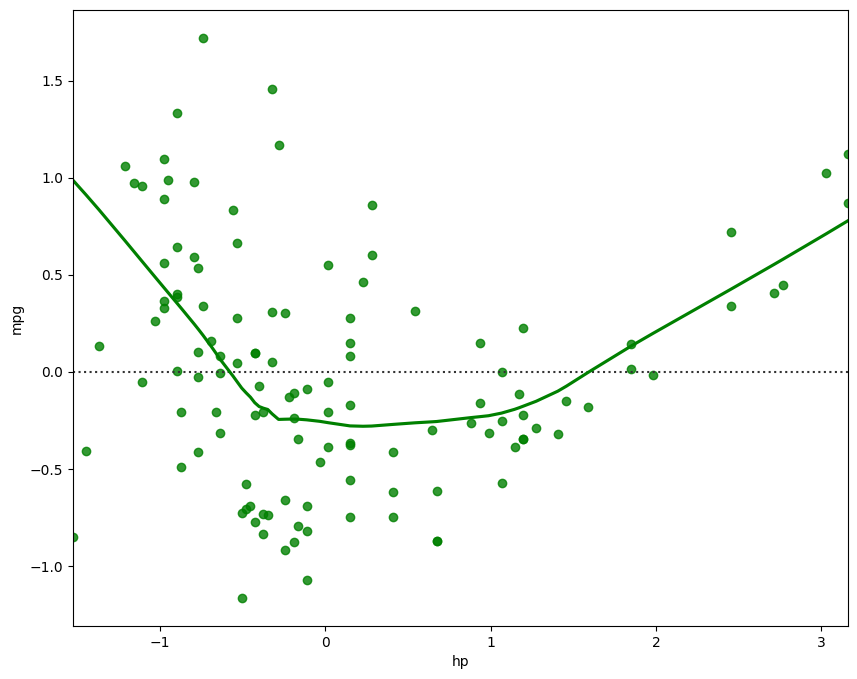

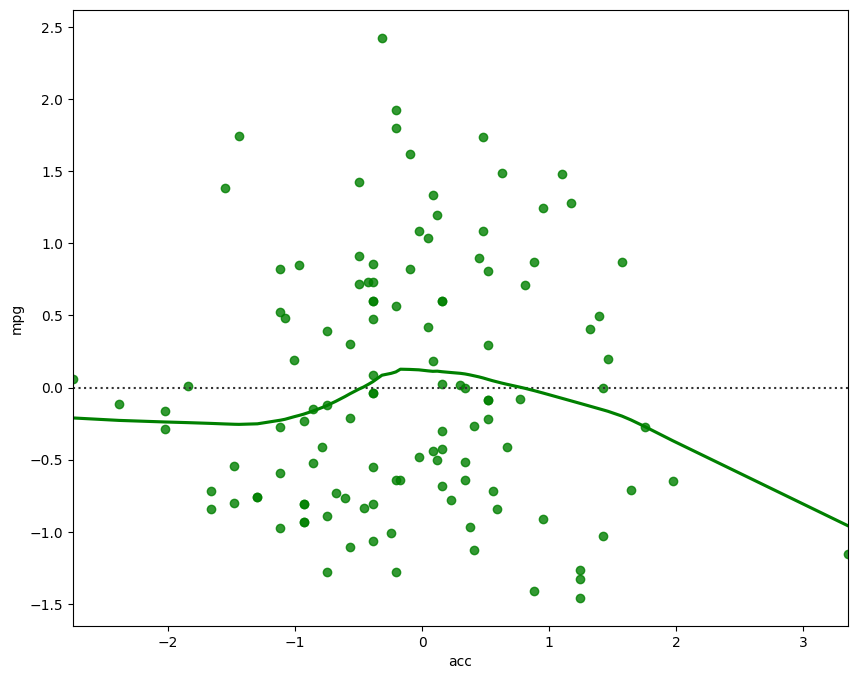

In [ ]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

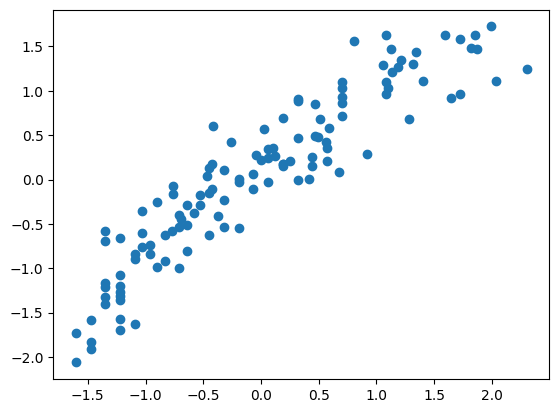

In [ ]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['mpg'], y_pred)